Most of the content presented in this notebook is inspired by the following content.

[Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

[Python Pandas Tutorial (Part 10): Working with Dates and Time Series Data](https://www.youtube.com/watch?v=UFuo7EHI8zc&ab_channel=CoreySchafer)

__Agenda__

- Introduction to modules and libraries to handle time and dates in Python

- Introduction to tools available in Pandas library to work with time and dates.

# Libraries to work with Time and Dates in Python

## Datetime Module

In [1]:
## import datetime module
from datetime import datetime


What does it mean to import datetime from datetime? 

[Reference to the source code](https://github.com/python/cpython/blob/3.10/Lib/datetime.py)


In [2]:
## now we can create a datetime object
today = datetime(year = 2021, month = 10, day = 28)


To check other arguments: [Reference to the documentation](https://docs.python.org/3/library/datetime.html#datetime.datetime)

[Also we might want to talk about `aware` and `naive` object categories](https://docs.python.org/3/library/datetime.html#aware-and-naive-objects)

In [3]:
today.strftime('%A')

'Thursday'

## Dateutil Library

In [4]:
## we could also use dateutil library to parse time and date
## note that dateutil is a third-party library and needs to be installed first.

## let's import parser from dateutil

from dateutil import parser

[Dateutil - Pypi](https://pypi.org/project/python-dateutil/)

In [5]:
## parser allow us to convert strings to datetime.datetime objects
parser.parse('July 4th of 2021')
## parser has a parse method to parse strings



datetime.datetime(2021, 7, 4, 0, 0)

Note that the result is `datetime` object.

In [6]:
## note that this is pretty robust

parser.parse('4th of July --- 2021')

parser.parse('2021, July 4')

parser.parse('2021/07/04')

parser.parse('28th Oct. 2021')

datetime.datetime(2021, 10, 28, 0, 0)

__Working with `datetime` object__


In [7]:
## let's create a datetime object let's say my birthday 03-15-1982
my_birthday = datetime(year= 1982, month = 3, day =15)


In [8]:
## we can check the day of the week

my_birthday.strftime('%A')


'Monday'

In [9]:
## note that using .strftime method we can convert the time into any string format.
my_birthday.strftime('(%a)-%d/%B--%Y')

'(Mon)-15/March--1982'

[Reference to `strfformat` directives](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

# Numpy `datetime64` type

Why another data type?: Efficient storage and vectorized operations

In [10]:
import numpy as np

In [11]:
## note that in the case of working with a lot dates and time 
## this is the compact way to store data
date = np.array(['2021-10-28'], dtype = 'datetime64')
## use np.array with dtype argument to create today as np.datetime64 object
date

array(['2021-10-28'], dtype='datetime64[D]')

In [12]:
2**64

18446744073709551616

[Numpy - Datetime Documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html)

In [13]:
## note that we can easily apply vectorized operations

date + np.arange(10)

array(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
       '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
       '2021-11-05', '2021-11-06'], dtype='datetime64[D]')

Note that numpy automatically choosed 'D' as the unit.

In [14]:
## now we can select second as the unit and let's see the difference
date = np.array(['2021-10-28'], dtype = 'datetime64[Y]')

date + np.arange(12)

array(['2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028',
       '2029', '2030', '2031', '2032'], dtype='datetime64[Y]')

[All available datetime-units](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units)

## Date and Times in Pandas

In [15]:
## let's import pandas
import pandas as pd

In [16]:
## the most basic data structure that pandas using is Timestamp
today = pd.Timestamp(year= 2021, month = 10, day = 28)
## to create it we can use pd.to_datetime


In [17]:
pd.Timestamp(10000, unit='D')

Timestamp('1997-05-19 00:00:00')

In [18]:
today.day_name()

'Thursday'

In [19]:
today.strftime('%A')

'Thursday'

[pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[Pandas Timestamp Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html)

In [20]:
pd.to_datetime('Oct. 28th 2021')

Timestamp('2021-10-28 00:00:00')

In [21]:
## note that pandas uses both datetime module and numpy.datetime64 data dtype
## so we can use some of the methods used in these modules. 




In [22]:
## there are also some additional methods that are very hadny when you analyze data.


In [23]:
## let's consider the following example

data_url ='https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/ETH-1.csv'
df = pd.read_csv(data_url)

In [24]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [25]:
# Run this to see that it fails
# pd.to_datetime(df.Date)

[What is Ethereum](https://ethereum.org/en/eth/)

In [26]:
## note that in this case 
## it is not straightforward to convert strings to datetime
## let's try pd.to_datetime

In [27]:
df.Date.iloc[1]

'2020-03-13 07-PM'

In [28]:
## We can use the format parameter to give the format of the string

## use pd.to_datetime together with format argument
pd.to_datetime(df.Date, format = '%Y-%m-%d %I-%p').iloc[1]

Timestamp('2020-03-13 19:00:00')

[pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[strftime - strptime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [29]:
## we could also directly load the data and parse the date as datetime

## for some cases it is very easy to do!
## use parse_dates and infer_datetime_format in pd.read_csv

pd.read_csv(data_url, parse_dates = ['Date'], infer_datetime_format= True)
## but this example is not one of those!

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [30]:
## in this case we need to pass a parser to date_parser argument

## define my_time_parser
## this takes a string and return pd.to_datetime 
def my_time_parser(date):
  return pd.to_datetime(date, format = '%Y-%m-%d %I-%p')

## or we could use datetime.strptime mehtod

## again use read_csv but this time pass my_time_parser to date_parser argument

df1 = pd.read_csv(data_url, parse_dates= ['Date'], date_parser= my_time_parser)

In [31]:
def my_addition(a, b):
  return a+b

f = lambda a,b: a+b

In [32]:
f(3,5)

8

In [33]:
## note that we could directly pass a lambda function too.

df1 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/ETH-1.csv', 
                  parse_dates= ['Date'], 
                  date_parser = lambda date: datetime.strptime(date, '%Y-%m-%d %I-%p'))

df1.Date

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [34]:
## note that each entry is an timestamp

## so we can use the timestamp methods
df1.Date.iloc[2].weekofyear

## but if we try to use these methods on all of the series this might not work

df1.Date.dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [35]:
## Instead we should use .dt class to be able to access datetime methods.
df1.Date.dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [36]:
## check min of date
df1.Date.min()
## check max of date

df1.Date.max()
## note that the result is timedelta type

df1.Date.max() - df1.Date.min()
df1.Date.min() - df1.Date.max()

Timedelta('-987 days +15:00:00')


__TimeDeltas__

In [37]:
## note that we can still use vectorized operations
today + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
               '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08'],
              dtype='datetime64[ns]', freq=None)

In [38]:
today

Timestamp('2021-10-28 00:00:00')

In [39]:
## note again that we get timedelta objects when we check the difference of two timestamps
df1.Date - df1.Date.min()

0       986 days 09:00:00
1       986 days 08:00:00
2       986 days 07:00:00
3       986 days 06:00:00
4       986 days 05:00:00
               ...       
23669     0 days 04:00:00
23670     0 days 03:00:00
23671     0 days 02:00:00
23672     0 days 01:00:00
23673     0 days 00:00:00
Name: Date, Length: 23674, dtype: timedelta64[ns]

### Indexing by time

When you are working with time data it is generally good idea to index your dataframe with the time.

In [40]:
## let's set the index key as 'Date' column
df1.set_index(keys = 'Date', inplace= True)

In [41]:
df1.sort_index(inplace = True)

In [42]:
## another way of indexing a dataframe with DatetimeIndex is 
## when you create the dataframe
index = pd.DatetimeIndex(['2018-11-24', '2019-9-25', '2020-10-21', '2021-10-27', '2021-10-28'])

data = pd.Series([2,3,5,7,11], index= index)

data

2018-11-24     2
2019-09-25     3
2020-10-21     5
2021-10-27     7
2021-10-28    11
dtype: int64

In [43]:
## Advantage of working with a dataframe index with DatetimeIndex
df1.head()
## now we can slice our data very easly
## let's get all the rows from 2020-01
df1['2019-01': '2019-02']


,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-01 00:00:00,ETHUSD,130.53,131.91,130.48,131.62,1067136.21
2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
...,...,...,...,...,...,...
2019-02-28 19:00:00,ETHUSD,136.00,137.50,134.17,135.57,1208793.69
2019-02-28 20:00:00,ETHUSD,135.57,135.60,134.37,134.99,1023140.26
2019-02-28 21:00:00,ETHUSD,134.99,135.37,134.86,135.13,330511.15


## Resampling

### Resample vs Asfreq

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 

In [45]:
## first make sure that you sort your index 

## let's create a variable open for the opening values of the Ethereum

open = df1.Open

In [46]:
open

Date
2017-07-01 11:00:00    279.98
2017-07-01 12:00:00    275.01
2017-07-01 13:00:00    274.83
2017-07-01 14:00:00    268.79
2017-07-01 15:00:00    265.74
                        ...  
2020-03-13 16:00:00    124.85
2020-03-13 17:00:00    124.08
2020-03-13 18:00:00    124.47
2020-03-13 19:00:00    119.51
2020-03-13 20:00:00    129.94
Name: Open, Length: 23674, dtype: float64

[Date Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [47]:
## here use resample with 'BA' offset
open.resample('BA').mean()

Date
2017-12-29    345.722109
2018-12-31    483.887252
2019-12-31    180.763469
2020-12-31    196.696462
Freq: BA-DEC, Name: Open, dtype: float64

In [48]:
## here use asfreq method with 'BA' offset and compare
open.asfreq('BA')


Date
2017-12-29 11:00:00    715.00
2018-12-31 11:00:00    135.51
2019-12-31 11:00:00    131.32
Freq: BA-DEC, Name: Open, dtype: float64

(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669., 737791.]),
 <a list of 10 Text major ticklabel objects>)

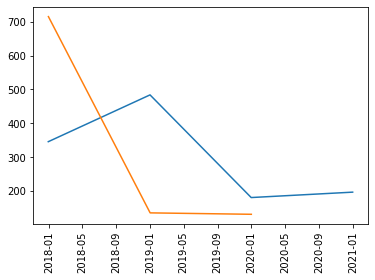

In [49]:
## Plot them in the same plot
plt.plot(open.resample('BA').mean())
plt.plot(open.asfreq('BA'))
plt.xticks(rotation =90)

### Rolling Windows

[Moving Average](https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db)

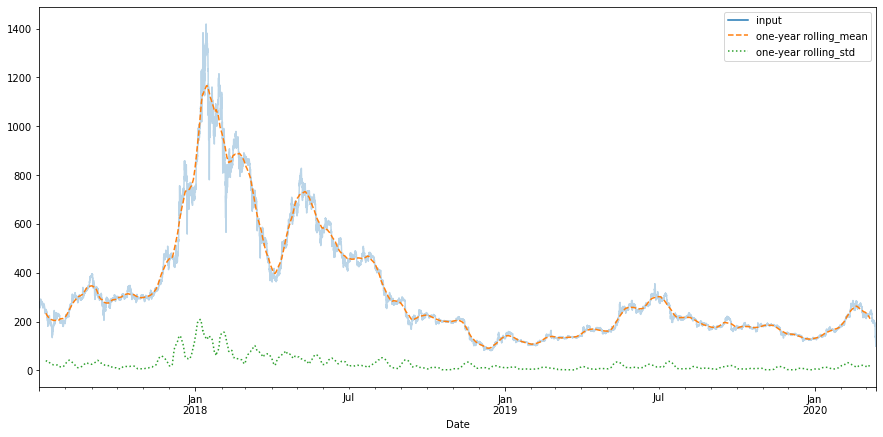

In [50]:
rolling = open.rolling(365, center =True)

data = pd.DataFrame({'input': open,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize = (15,7))
ax.lines[0].set_alpha(0.3)

In [51]:
open

Date
2017-07-01 11:00:00    279.98
2017-07-01 12:00:00    275.01
2017-07-01 13:00:00    274.83
2017-07-01 14:00:00    268.79
2017-07-01 15:00:00    265.74
                        ...  
2020-03-13 16:00:00    124.85
2020-03-13 17:00:00    124.08
2020-03-13 18:00:00    124.47
2020-03-13 19:00:00    119.51
2020-03-13 20:00:00    129.94
Name: Open, Length: 23674, dtype: float64

In [52]:
open.head()

Date
2017-07-01 11:00:00    279.98
2017-07-01 12:00:00    275.01
2017-07-01 13:00:00    274.83
2017-07-01 14:00:00    268.79
2017-07-01 15:00:00    265.74
Name: Open, dtype: float64

In [53]:
one_day_shift = open.shift(-1)

In [54]:
two_days_shift = open.shift(-2)

today = a*one_day_shift + b*   + \mu 

[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

# Lab

[Follow this tutorial to replicate the results](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts)

[Read this blog and u](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)